# Exploratory Data Analysis (EDA)

### Data Loading

In [7]:
import pandas as pd

df = pd.read_parquet('./../data/dataset.parquet', engine='pyarrow')

## Basic Exploration

In [8]:
# Check the dataset has been imported correctly
df.shape

(679045, 17)

In [10]:
# Visualise the dataset
df.head()

,Timestamp,Flag roping,Platform Position [°],Platform Motor frequency [HZ],Temperature platform drive [°C],Temperature slave drive [°C],Temperature hoist drive [°C],Tensione totale film [%],Current speed cart [%],Platform motor speed [%],Lifting motor speed [RPM],Platform rotation speed [RPM],Slave rotation speed [M/MIN],Lifting speed rotation [M/MIN],session_counter,time_to_failure,alert_11
0,2021-06-07 04:14:30.742,31.0,115.0,5200.0,18.0,22.0,18.0,181.0,0.0,100.0,0.0,84.0,116.0,0.0,519.0,86275.0,0.0
1,2021-06-07 04:14:35.742,31.0,115.0,5200.0,18.0,22.0,18.0,181.0,0.0,100.0,0.0,84.0,116.0,0.0,519.0,86270.0,0.0
2,2021-06-07 04:14:40.742,31.0,115.0,5200.0,18.0,22.0,18.0,181.0,0.0,100.0,0.0,84.0,116.0,0.0,519.0,86265.0,0.0
3,2021-06-07 04:14:45.742,31.0,115.0,5200.0,18.0,22.0,18.0,181.0,0.0,100.0,0.0,84.0,116.0,0.0,519.0,86260.0,0.0
4,2021-06-07 04:14:50.742,31.0,115.0,5200.0,18.0,22.0,18.0,181.0,0.0,100.0,0.0,84.0,116.0,0.0,519.0,86255.0,0.0


In [24]:
# Get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679045 entries, 0 to 8796486
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Timestamp                        679045 non-null  datetime64[ns]
 1   Flag roping                      679045 non-null  float64       
 2   Platform Position [°]            679045 non-null  float64       
 3   Platform Motor frequency [HZ]    679045 non-null  float64       
 4   Temperature platform drive [°C]  679045 non-null  float64       
 5   Temperature slave drive [°C]     679045 non-null  float64       
 6   Temperature hoist drive [°C]     679045 non-null  float64       
 7   Tensione totale film [%]         679045 non-null  float64       
 8   Current speed cart [%]           679045 non-null  float64       
 9   Platform motor speed [%]         679045 non-null  float64       
 10  Lifting motor speed [RPM]        679045 non-null

In [11]:
# Print the total number of unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Timestamp: 679045
Flag roping: 2
Platform Position [°]: 157
Platform Motor frequency [HZ]: 25
Temperature platform drive [°C]: 62
Temperature slave drive [°C]: 55
Temperature hoist drive [°C]: 56
Tensione totale film [%]: 337
Current speed cart [%]: 11
Platform motor speed [%]: 25
Lifting motor speed [RPM]: 11
Platform rotation speed [RPM]: 24
Slave rotation speed [M/MIN]: 39
Lifting speed rotation [M/MIN]: 47
session_counter: 2448
time_to_failure: 175657
alert_11: 2


Surprisingly, it is not only `alert_11` that contains two distinct values, but `Flag roping` as well. Let us examine what these values are.

### `Flag roping` investigation

In [12]:
# Print the unique values of flag roping
print(df['Flag roping'].unique())

[31.  0.]


It appears that the machine does not categorise flags into different types but rather distinguishes them solely as active or non-active. This raises the question of whether there is a relationship between `Flag roping` and `alert_11`. A correlation matrix should provide some insight into this potential connection.

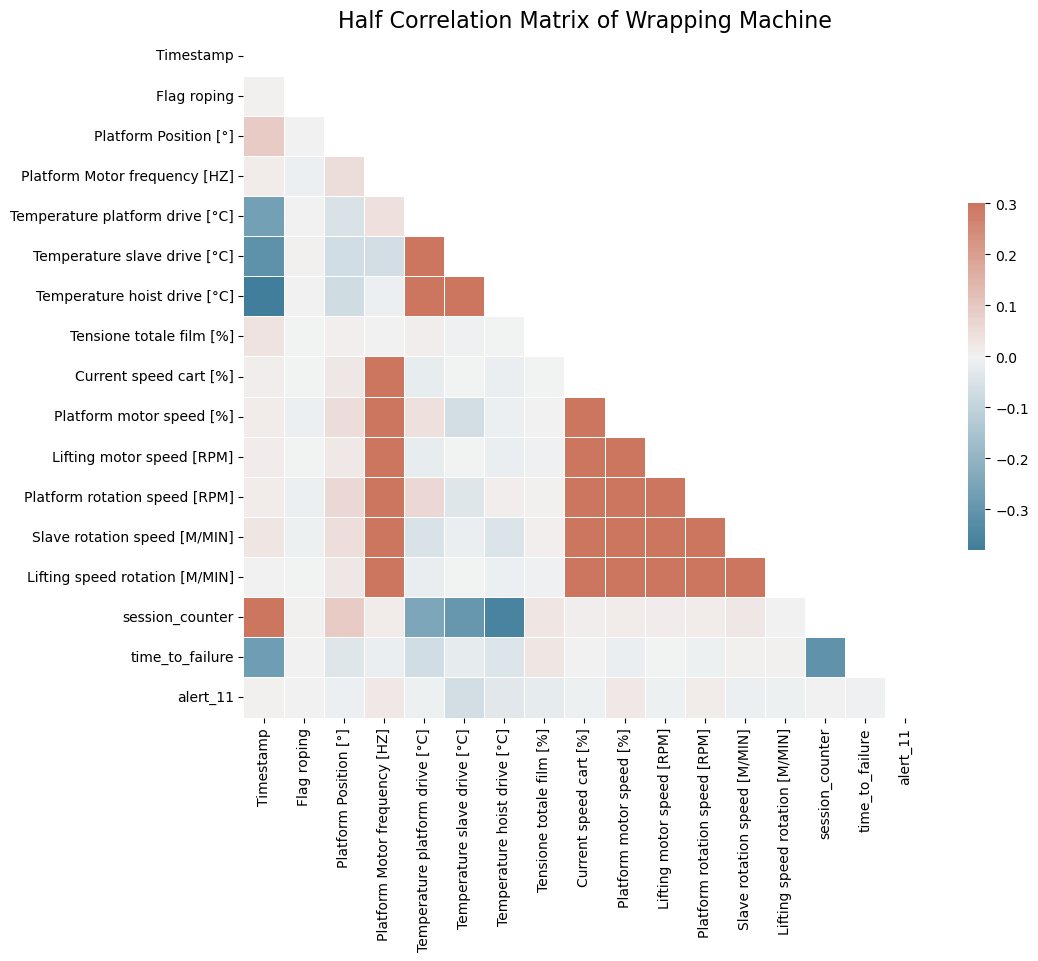

In [15]:
# Correlation matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title to the plot
plt.title("Half Correlation Matrix of Wrapping Machine", fontsize=16)

plt.show()

It appears that there is no significant correlation between `Flag roping` and `alert_11`. However, as anticipated, there are notable correlations between the two types of temperatures, as well as among the various speed and rotation measurements. 

One particularly noteworthy observation is that `alert_11` does not exhibit a strong correlation with any of the other features, which is somewhat unexpected. However, it is important to recognise that correlation matrices are effective only in detecting linear relationships. This suggests that while `alert_11` may still be related to other features, these relationships are likely nonlinear in nature.

At this stage, driven by both curiosity and the desire to gain a deeper understanding of the dataset, I decided to visualise the distribution of `Flag roping`.

In [16]:
# Count the occurrences of 0 and 31 in 'Flag roping' to have a better picture of it
flag_roping_counts = df['Flag roping'].value_counts()

print(f"Total number of 0s in Flag roping: {flag_roping_counts.get(0, 0)}")
print(f"Total number of 31s in Flag roping: {flag_roping_counts.get(31, 0)}")

Total number of 0s in Flag roping: 14
Total number of 31s in Flag roping: 679031


### `alert_11` Investigation

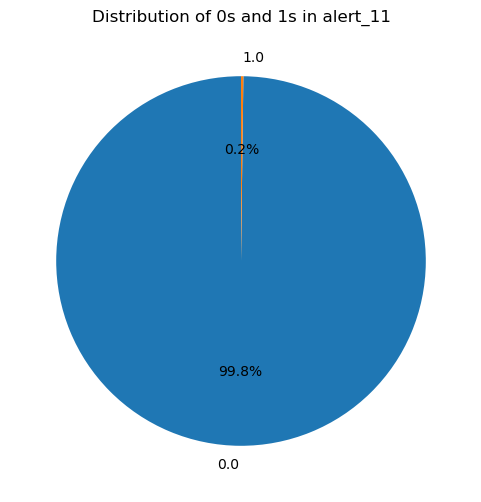

In [19]:
# Count the occurrences of 0 and 1 in 'alert_11'
alert_11_counts = df['alert_11'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(alert_11_counts, labels=alert_11_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of 0s and 1s in alert_11')
plt.show()

As stated in the paper, the dataset is extremely imbalanced:
> Alerts are anomalies and thus, by definition, rarer than normal behaviors. For this reason, the number of RWs with label no failure is significantly greater than that of RWs with label failure, leading to a heavily imbalanced data set.

Given that the number appears to be quite small, I am particularly interested in determining the exact count of ones present in the `alert_11` column across the entire dataset.

In [18]:
# Count the occurrences of 0 and 1 in 'alert_11' to have a bitter picture of it
alert_11_counts = df['alert_11'].value_counts()

# Print the total number of 0s and 1s
print(f"Total number of 0s in alert_11: {alert_11_counts.get(0, 0)}")
print(f"Total number of 1s in alert_11: {alert_11_counts.get(1, 0)}")

Total number of 0s in alert_11: 677652
Total number of 1s in alert_11: 1393


As demonstrated by the two previous analyses, the dataset is highly imbalanced. However, this is expected, as the data originates from real manufacturing processes rather than being synthetically generated.

Now, let's plot `alert_11` occurance over the dataset.

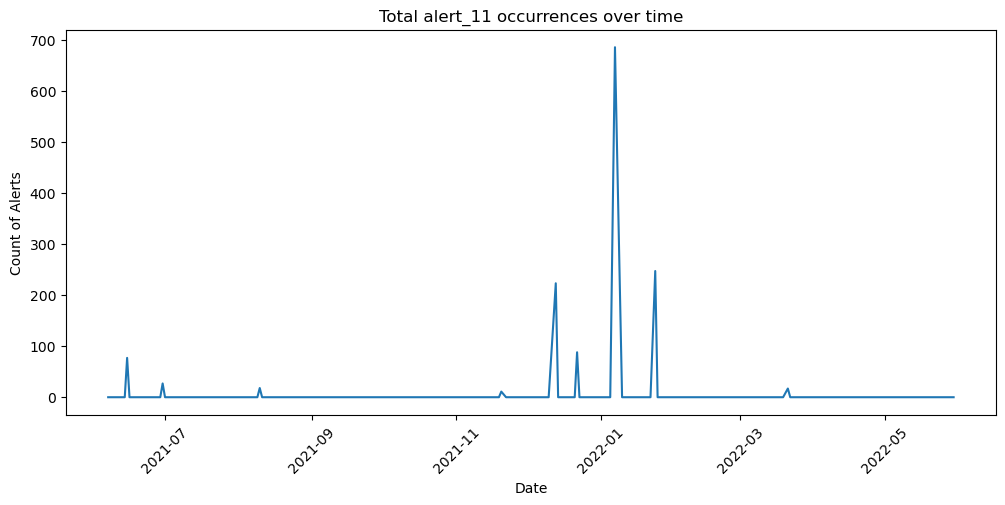

In [22]:
# Plot total alert_11 occurrences over time
plt.figure(figsize=(12, 5))
df.groupby(df["Timestamp"].dt.date)["alert_11"].sum().plot()
plt.title("Total alert_11 occurrences over time")
plt.xlabel("Date")
plt.ylabel("Count of Alerts")
plt.xticks(rotation=45)
plt.show()

It would be interesting to see the occurances of 1s and 0s in the dataset.

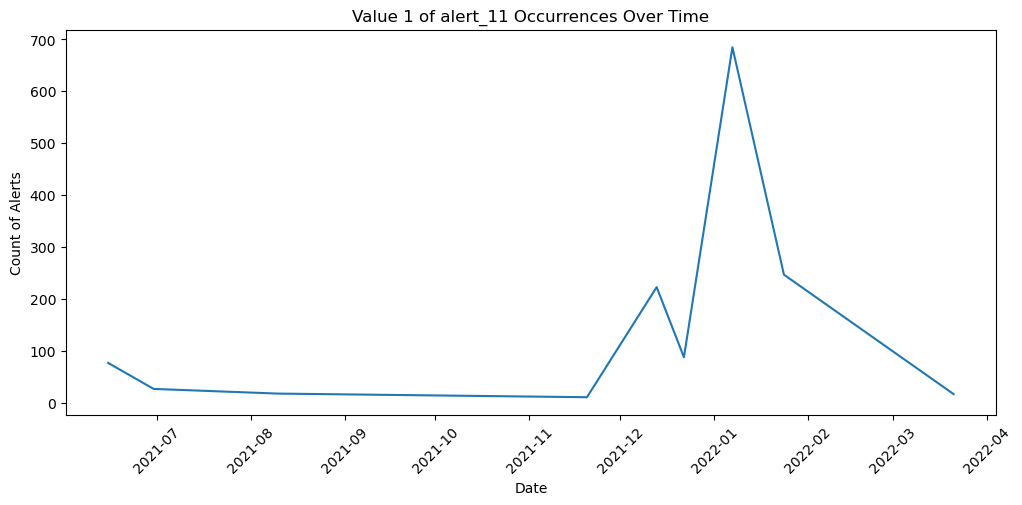

In [21]:
# Plot the value 1 of alert_11 occurrences over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df[df['alert_11'] == 1].groupby(df["Timestamp"].dt.date)["alert_11"].count().plot()
plt.title("Value 1 of alert_11 occurrences over time")
plt.xlabel("Date")
plt.ylabel("Count of Alerts")
plt.xticks(rotation=45)
plt.show()

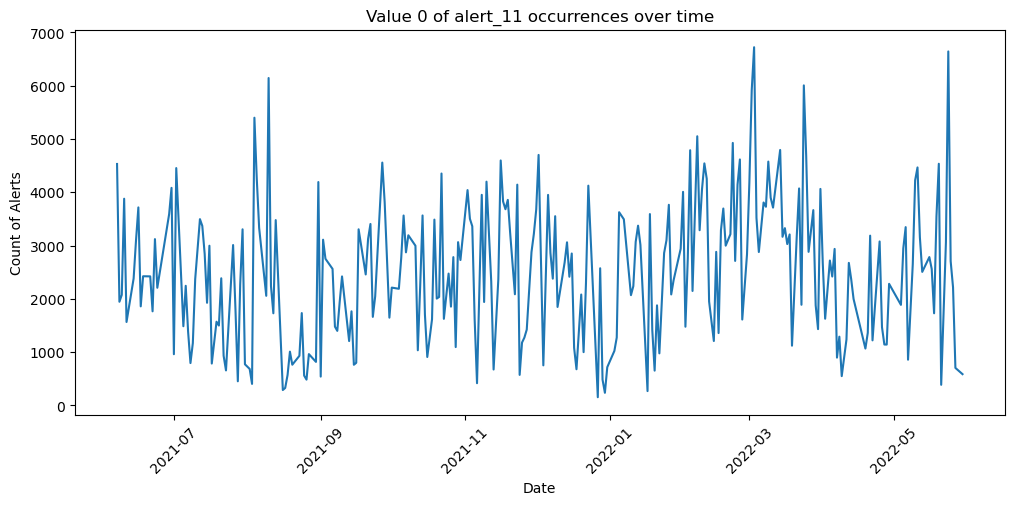

In [23]:
# Plot the value 0 of alert_11 occurrences over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df[df['alert_11'] == 0].groupby(df["Timestamp"].dt.date)["alert_11"].count().plot()
plt.title("Value 0 of alert_11 occurrences over time")
plt.xlabel("Date")
plt.ylabel("Count of Alerts")
plt.xticks(rotation=45)
plt.show()

### Negative values

In [25]:
# Get more information about the dataset
df.describe()

,Timestamp,Flag roping,Platform Position [°],Platform Motor frequency [HZ],Temperature platform drive [°C],Temperature slave drive [°C],Temperature hoist drive [°C],Tensione totale film [%],Current speed cart [%],Platform motor speed [%],Lifting motor speed [RPM],Platform rotation speed [RPM],Slave rotation speed [M/MIN],Lifting speed rotation [M/MIN],session_counter,time_to_failure,alert_11
count,679045,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000,679045.000000
mean,2021-12-12 02:56:03.139916288,30.999361,163.937436,694.531602,23.766837,23.444327,21.303289,165.357471,2.150718,13.383201,116.676833,10.785796,11.759514,0.933471,1774.609225,237645.982894,0.002051
min,2021-06-07 04:14:30.742000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,-1.000000,0.000000
25%,2021-09-23 07:20:51.624999936,31.000000,62.000000,0.000000,15.000000,16.000000,13.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1183.000000,21660.000000,0.000000
50%,2021-12-15 10:35:25.176000,31.000000,165.000000,0.000000,22.000000,22.000000,19.000000,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1823.000000,133510.000000,0.000000
75%,2022-03-05 02:57:31.095000064,31.000000,260.000000,0.000000,32.000000,30.000000,28.000000,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2364.000000,405595.000000,0.000000
max,2022-05-30 17:50:43.374000,31.000000,359.000000,5200.000000,61.000000,55.000000,55.000000,9900.000000,100.000000,100.000000,5500.000000,88.000000,184.000000,73.000000,2966.000000,878275.000000,1.000000
std,NaN,0.140758,111.206953,1578.580228,11.435006,9.969298,9.974128,211.047433,12.512806,30.393794,685.563601,25.029436,32.598768,5.634515,694.349995,251492.449400,0.045246


The 25%, 50%, and 75% percentile results indicate that the majority of features have fixed values, which is expected in a manufacturing environment where machines must operate within specific parameters to ensure proper functionality. 

However, one value in the table appears suspicious: the **minimum** of `Tensione totale film [%]`, which is recorded as -100, unlike all other minimum values that are zero. To investigate this anomaly, `Tensione totale film [%]` should be visualised over time across the entire dataset. 

If this value occurs only a few times, it may be considered an error or anomaly that should be removed to prevent bias in the models. However, if it appears consistently, it represents a legitimate data value that must be accounted for in the analysis.

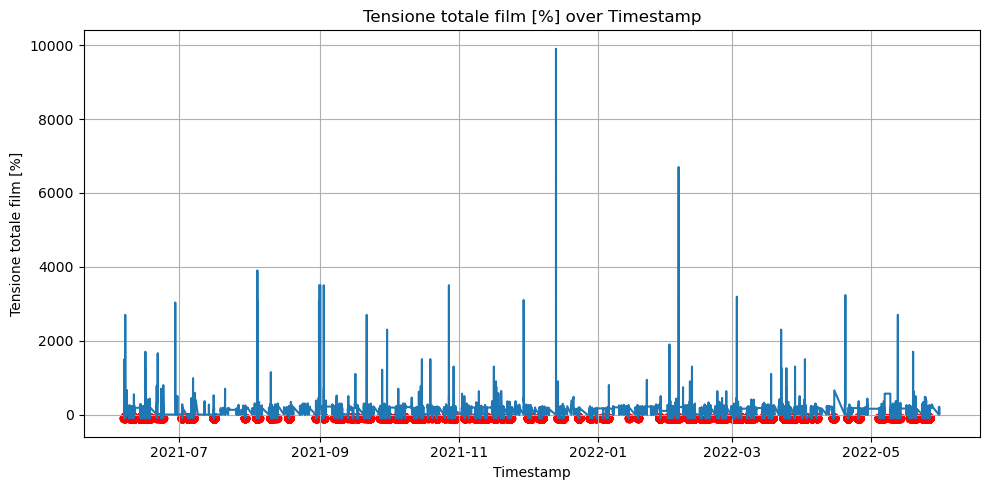

In [26]:
# Plotting Tensione totale film [%] over dataset time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Timestamp'], df['Tensione totale film [%]'])
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tensione totale film [%]')
ax.grid(True)
ax.set_title('Tensione totale film [%] over Timestamp')

ttf_negative = df[df['Tensione totale film [%]'] < 0]
ax.scatter(ttf_negative['Timestamp'], ttf_negative['Tensione totale film [%]'], color='red')

fig.tight_layout()
plt.show()

It appears that `Tensione totale film [%]` is indeed a legitimate value that remains constant throughout the dataset. 

However, another suspicious value emerges from the **describe** table: the **minimum** of `alert_11`, which is recorded as -1. To determine whether this value represents an error or a genuine data point, we will apply the same approach used for `Tensione totale film [%]`. 

If the -1 value appears only sporadically, it may indicate an error that should be addressed. Conversely, if it occurs consistently over time, it should be considered a valid data point. 

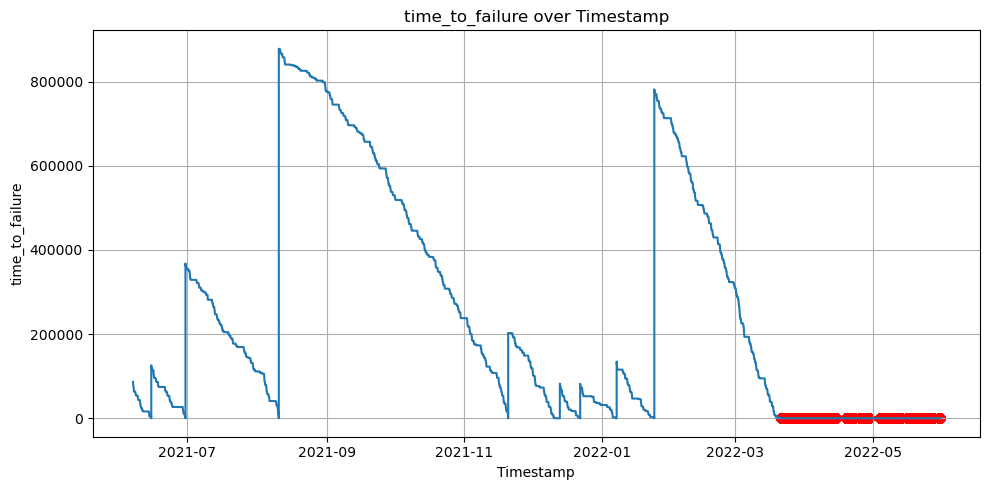

In [27]:
# Plotting time_to_failure over dataset time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['Timestamp'], df['time_to_failure'])
ax.set_xlabel('Timestamp')
ax.set_ylabel('time_to_failure')
ax.grid(True)
ax.set_title('time_to_failure over Timestamp')

ttf_negative = df[df['time_to_failure'] < 0]
ax.scatter(ttf_negative['Timestamp'], ttf_negative['time_to_failure'], color='red')

fig.tight_layout()
plt.show()

As shown in the plot, the only negative values in the dataset appear towards its end, beginning around mid-March and persisting until the dataset's conclusion. This pattern suggests that an error or system malfunction may have occurred during this period. 

To gain a deeper understanding of this anomaly, a more detailed investigation is conducted.

In [28]:
ttf_negative['time_to_failure'].describe()

count    130301.0
mean         -1.0
std           0.0
min          -1.0
25%          -1.0
50%          -1.0
75%          -1.0
max          -1.0
Name: time_to_failure, dtype: float64

To understand the presence of the value -1 in the `time_to_failure` column, it is essential to consider how the dataset was constructed. As stated in its associated paper:  

> Depending on the changes detected by sensors, the irregular sampling time is addressed by resampling the time series with a frequency of 5 seconds, which gives a good trade-off between memory occupation and signal resolution. Missing values are filled in using the last available observation because the absence of new measurements indicates no change in the recorded value.  

Based on this information, it can be deduced that since the initial appearance of the value -1, no failures have been recorded in the dataset. As a result, the `time_to_failure` column has not been updated, leading to the persistence of this value.  

To validate this hypothesis, the `alert_11` variable is examined to determine whether any alerts occurred during the time frame in which the -1 values were detected in the `time_to_failure` column.

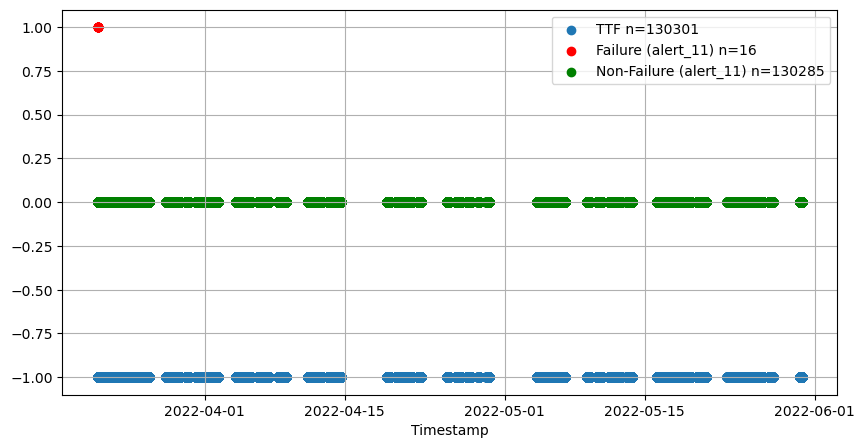

In [29]:
df = df.reset_index(drop=True)

first_ttf_negative_index = df[df['time_to_failure'] < 0].index[0]
ttf_neg_tailoring = df[first_ttf_negative_index:]

total_points = len(ttf_neg_tailoring)
alert_11_active_count = len(ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] == 1])
alert_11_inactive_count = len(ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] != 1])

fig, axs = plt.subplots(figsize=(10, 5))

axs.scatter(ttf_neg_tailoring['Timestamp'], ttf_neg_tailoring['time_to_failure'], label=f'TTF n={total_points}')
axs.scatter(ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] == 1]['Timestamp'],
            ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] == 1]['alert_11'], color='red',
            label=f'Failure (alert_11) n={alert_11_active_count}')
axs.scatter(ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] != 1]['Timestamp'],
            ttf_neg_tailoring[ttf_neg_tailoring['alert_11'] != 1]['alert_11'], color='green',
            label=f'Non-Failure (alert_11) n={alert_11_inactive_count}')

axs.set_xlabel('Timestamp')
axs.grid(True)

axs.legend()

plt.show()

The graph above illustrates the most recent alert detection and indicates that no further alerts have been registered since that point. This observation validates the previously proposed theory, reinforcing the conclusion that the absence of updates in the `time_to_failure` column is due to the lack of recorded failures.

However, as stated in the associated paper, for classification purposes, columns such as `time_to_failure` and `session_counter` are not relevant and will therefore be removed during the pre-processing stage. 

> The first phase is feature selection. Since not all the quantities are equally relevant, only 13 are kept based on the data description provided by the manufacturer and are summarized in Table 1.

Nevertheless, the values containing -1 in the `time_to_failure` column remains valid and will still be considered in the classification process. The key distinction is that while the `time_to_failure` and `session_counter` columns will be excluded, the rest of the dataset, including the relevant features, will continue to contribute to the analysis.